# Objective:
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

Context: 
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

Data Description: 
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Data Dictionary:

RowNumber: Row number.

CustomerId: Unique identification key for different customers.

Surname: Surname of the customer

Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.

Geography: The country to which the customer belongs.
Gender: The gender of the customer.

Age: Age of the customer.

Tenure: The period of time a customer has been associated with the bank.

Balance: The account balance (the amount of money deposited in the bank account) of the customer.

NumOfProducts: How many accounts, bank account affiliated products the person has.

HasCrCard: Does the customer have a credit card through the bank?

IsActiveMember: Subjective, but for the concept

EstimatedSalary: Estimated salary of the customer.

Exited: Did they leave the bank after all?

# The points distribution for this case is as follows:

1. Read the dataset
2. Drop the columns which are unique for all users like IDs (5 points)
3. Perform bivariate analysis and give your insights from the same (5 points) 
4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)
5. Normalize the train and test data (10points)
6. Initialize & build the model. Identify the points of improvement and implement the same. (20)
7. Predict the results using 0.5 as a threshold (10points)
8. Print the Accuracy score and confusion matrix (5 points)

In [1]:
!pip install tensorflow==2.4.1

In [2]:
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer  
from IPython.display import Image  
#pip install pydotplus
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn import metrics
#from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from matplotlib import cm

import warnings
warnings.filterwarnings('ignore')

C:\Users\Vicente\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
import tensorflow as tf
print(tf.__version__)

2.4.1


### 1. Read the dataset

In [4]:
bank_data = pd.read_csv("bank.csv")
bank_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,"96,270.64",0
9996,9997,15569892,Johnstone,516,France,Male,35,10,"57,369.61",1,1,1,"101,699.77",0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,"42,085.58",1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,"75,075.31",2,1,0,"92,888.52",1


### 2. Drop the columns which are unique for all users like IDs (5 points)

In [5]:
bank_data1 = bank_data.drop(['RowNumber'], axis =1)
bank_data1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [6]:
bank_data2 = bank_data1.drop(['Surname'], axis =1)
bank_data2.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,15647311,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15619304,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15701354,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,15737888,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [7]:
bank_data3 = bank_data2.drop(['Geography'], axis =1)
bank_data3.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,Female,42,2,0.00,1,1,1,"101,348.88",1
1,15647311,608,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15619304,502,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15701354,699,Female,39,1,0.00,2,0,0,"93,826.63",0
4,15737888,850,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [8]:
bank_data4 = bank_data3.drop(['CustomerId'], axis =1)
bank_data4.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,"101,348.88",1
1,608,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,502,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,699,Female,39,1,0.00,2,0,0,"93,826.63",0
4,850,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [9]:
bank_data4.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,"101,348.88",1
1,608,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,502,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,699,Female,39,1,0.00,2,0,0,"93,826.63",0
4,850,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


### 3. Perform bivariate analysis and give your insights from the same (5 points) 

In [10]:
bank_data4.shape

(10000, 10)

In [11]:
bank_data4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,"10,000.00",650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,"10,000.00",38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,"10,000.00",5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,"10,000.00","76,485.89","62,397.41",0.00,0.00,"97,198.54","127,644.24","250,898.09"
NumOfProducts,"10,000.00",1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,"10,000.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,"10,000.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,"10,000.00","100,090.24","57,510.49",11.58,"51,002.11","100,193.91","149,388.25","199,992.48"
Exited,"10,000.00",0.20,0.40,0.00,0.00,0.00,0.00,1.00


In [12]:
bank_data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


In [13]:
bank_data4.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
Age,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
Tenure,0.00,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01
Balance,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
NumOfProducts,0.01,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05
HasCrCard,-0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01
IsActiveMember,0.03,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
EstimatedSalary,-0.00,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01
Exited,-0.03,0.29,-0.01,0.12,-0.05,-0.01,-0.16,0.01,1.00


In [14]:
bank_data4.isnull().values.any()

False

In [15]:
bank_data4.isna().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

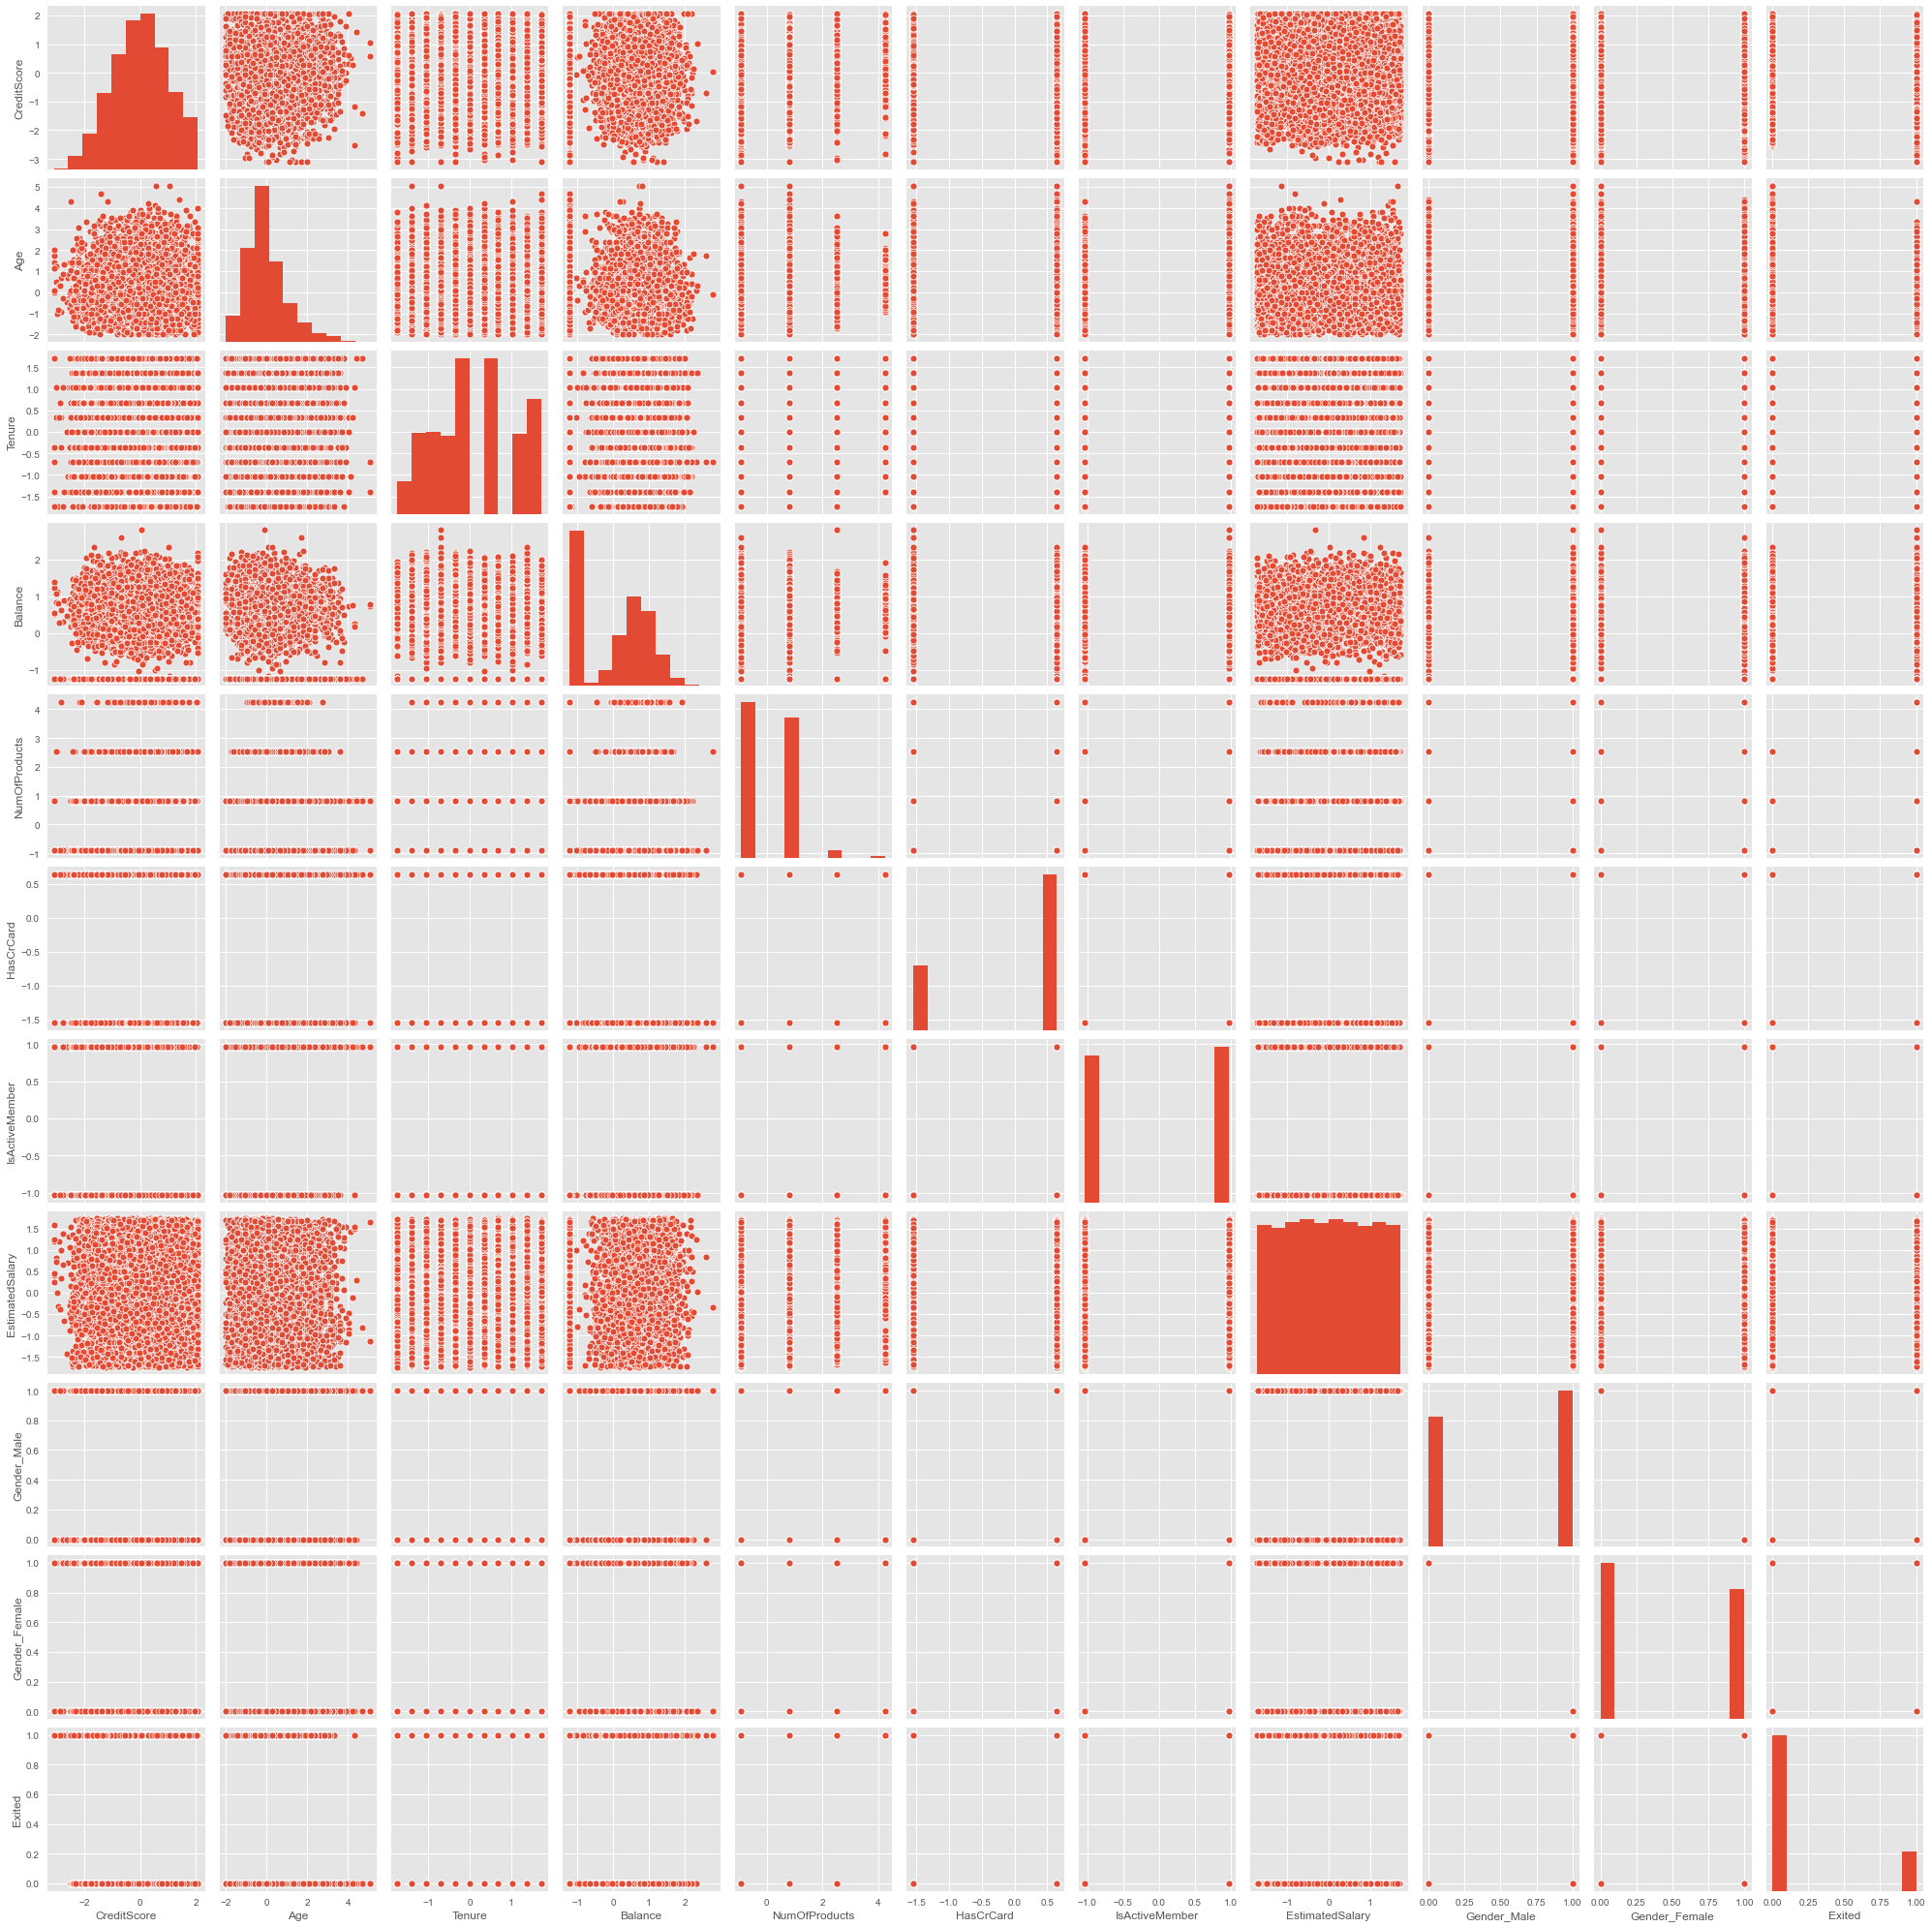

In [52]:
sns.pairplot(bank_data4)

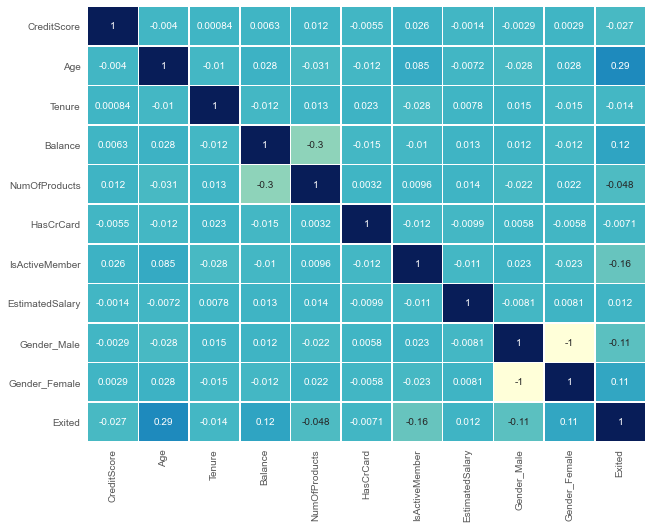

In [53]:
plt.figure(figsize=(10,8))

sns.heatmap(bank_data4.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [17]:
bank_data4 = pd.get_dummies(bank_data4)
bank_data4 = bank_data4.astype('float64') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
bank_data4

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
0,619.00,42.00,2.00,0.00,1.00,1.00,1.00,"101,348.88",1.00,1.00,0.00
1,608.00,41.00,1.00,"83,807.86",1.00,0.00,1.00,"112,542.58",0.00,1.00,0.00
2,502.00,42.00,8.00,"159,660.80",3.00,1.00,0.00,"113,931.57",1.00,1.00,0.00
3,699.00,39.00,1.00,0.00,2.00,0.00,0.00,"93,826.63",0.00,1.00,0.00
4,850.00,43.00,2.00,"125,510.82",1.00,1.00,1.00,"79,084.10",0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.00,39.00,5.00,0.00,2.00,1.00,0.00,"96,270.64",0.00,0.00,1.00
9996,516.00,35.00,10.00,"57,369.61",1.00,1.00,1.00,"101,699.77",0.00,0.00,1.00
9997,709.00,36.00,7.00,0.00,1.00,0.00,1.00,"42,085.58",1.00,1.00,0.00
9998,772.00,42.00,3.00,"75,075.31",2.00,1.00,0.00,"92,888.52",1.00,0.00,1.00


In [18]:
column_names = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember",  "EstimatedSalary", "Gender_Male", "Gender_Female", "Exited"]

bank_data4 = bank_data4.reindex(columns=column_names)

In [19]:
bank_data4

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Gender_Female,Exited
0,619.00,42.00,2.00,0.00,1.00,1.00,1.00,"101,348.88",0.00,1.00,1.00
1,608.00,41.00,1.00,"83,807.86",1.00,0.00,1.00,"112,542.58",0.00,1.00,0.00
2,502.00,42.00,8.00,"159,660.80",3.00,1.00,0.00,"113,931.57",0.00,1.00,1.00
3,699.00,39.00,1.00,0.00,2.00,0.00,0.00,"93,826.63",0.00,1.00,0.00
4,850.00,43.00,2.00,"125,510.82",1.00,1.00,1.00,"79,084.10",0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.00,39.00,5.00,0.00,2.00,1.00,0.00,"96,270.64",1.00,0.00,0.00
9996,516.00,35.00,10.00,"57,369.61",1.00,1.00,1.00,"101,699.77",1.00,0.00,0.00
9997,709.00,36.00,7.00,0.00,1.00,0.00,1.00,"42,085.58",0.00,1.00,1.00
9998,772.00,42.00,3.00,"75,075.31",2.00,1.00,0.00,"92,888.52",1.00,0.00,1.00


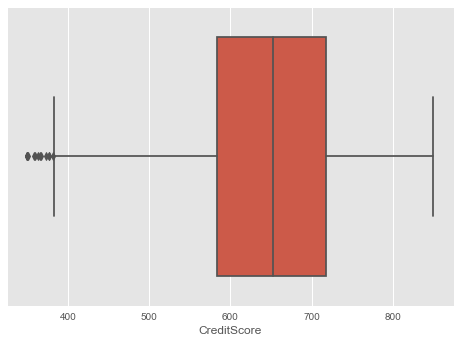

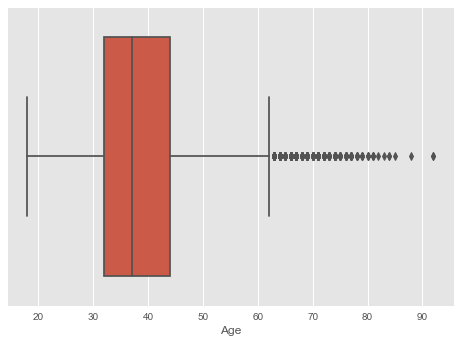

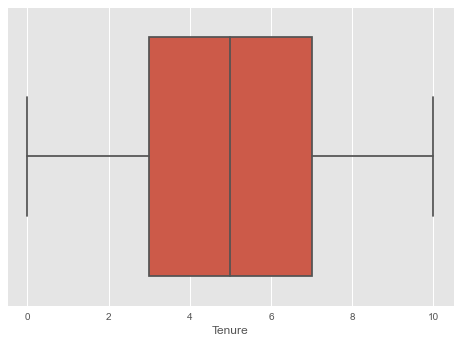

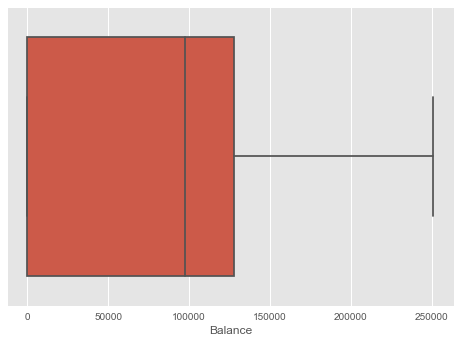

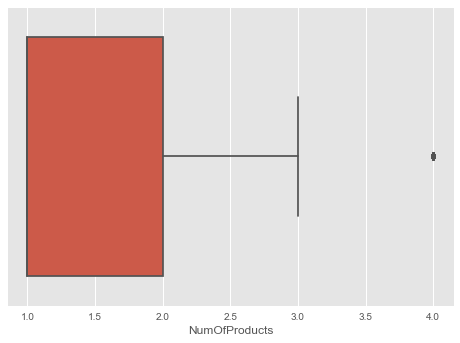

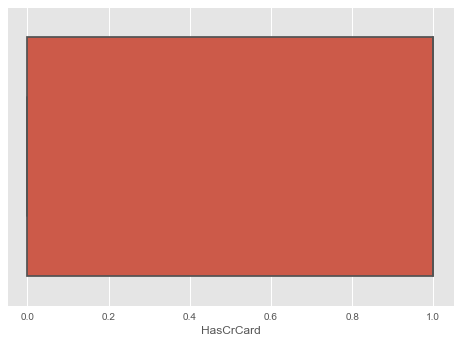

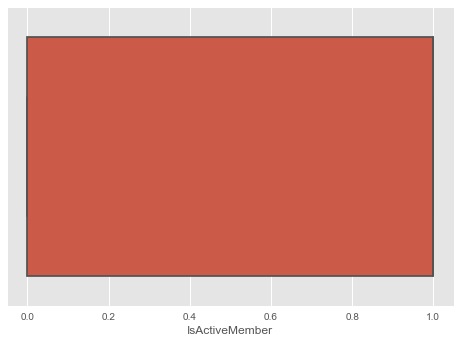

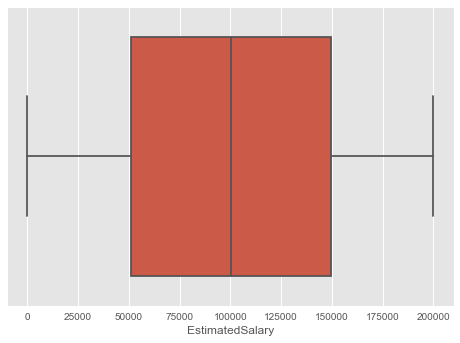

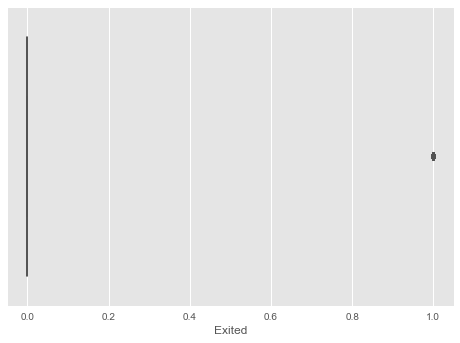

In [20]:
for i in ['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']:
    sns.boxplot(bank_data4[i])
    plt.show()

In [21]:
scaler = StandardScaler()
cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
bank_data4[cols] = scaler.fit_transform(bank_data4[cols])
bank_data4.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Gender_Female,Exited
0,-0.33,0.29,-1.04,-1.23,-0.91,0.65,0.97,0.02,0.00,1.00,1.00
1,-0.44,0.20,-1.39,0.12,-0.91,-1.55,0.97,0.22,0.00,1.00,0.00
2,-1.54,0.29,1.03,1.33,2.53,0.65,-1.03,0.24,0.00,1.00,1.00
3,0.50,0.01,-1.39,-1.23,0.81,-1.55,-1.03,-0.11,0.00,1.00,0.00
4,2.06,0.39,-1.04,0.79,-0.91,0.65,0.97,-0.37,0.00,1.00,0.00


In [22]:
bank_data4.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Gender_Female,Exited
0,-0.33,0.29,-1.04,-1.23,-0.91,0.65,0.97,0.02,0.00,1.00,1.00
1,-0.44,0.20,-1.39,0.12,-0.91,-1.55,0.97,0.22,0.00,1.00,0.00
2,-1.54,0.29,1.03,1.33,2.53,0.65,-1.03,0.24,0.00,1.00,1.00
3,0.50,0.01,-1.39,-1.23,0.81,-1.55,-1.03,-0.11,0.00,1.00,0.00
4,2.06,0.39,-1.04,0.79,-0.91,0.65,0.97,-0.37,0.00,1.00,0.00


In [23]:
#explorinfg column names
bank_data4.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Gender_Male', 'Gender_Female',
       'Exited'],
      dtype='object')

### 4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)

In [24]:
import tensorflow as tf
from sklearn import preprocessing

In [25]:
X_data = bank_data4.iloc[:, :-1]

In [26]:
X_data.shape

(10000, 10)

In [27]:
y_data = bank_data4.iloc[:, -1]

In [28]:
y_data.shape

(10000,)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7)

In [30]:
X_train = preprocessing.normalize(X_train)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 10)
(3000, 10)
(7000,)
(3000,)


### 5. Normalize the train and test data (10points)

In [32]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 10)
(3000, 10)
(7000,)
(3000,)


### 6. Initialize & build the model. Identify the points of improvement and implement the same. (20)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [36]:
model = Sequential()

In [37]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

layer = layers.Dense(
    units=64,
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)
)

tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

In [38]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)

In [39]:
model.add(Dense(256, input_dim=10, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dense(512, input_shape = (10,), activation = 'relu'))
#model.add(Dense(128, activation = 'tanh'))
model.add(Dense(128, activation = 'tanh'))
#model.add(Dense(1, activation = 'elu'))
model.add(Dense(1, activation = 'sigmoid'))
#model.add(Dense(1, activation = 'exponential'))

In [40]:
sgd = optimizers.Adamax(lr = 0.01)

In [41]:
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy']) 

In [42]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               2816      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 35,841
Trainable params: 35,841
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(X_train, y_train.values, batch_size = 300, epochs = 20, verbose = 1)

Epoch 1/20
24/24 [==============================] - 1s 3ms/step - loss: 1.0847 - accuracy: 0.7194
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.7998
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8154
Epoch 4/20
24/24 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.8410
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8400
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.8523
Epoch 7/20
24/24 [==============================] - 0s 3ms/step - loss: 0.3523 - accuracy: 0.8540
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8582
Epoch 9/20
24/24 [==============================] - 0s 3ms/step - loss: 0.3504 - accuracy: 0.8569
Epoch 10/20
24/24 [==============================] - 0s 3ms/step - loss: 0.3444 - accuracy: 0.8596
Epoch 11/20
24/24 [

### 7. Predict the results using 0.5 as a threshold (10points)

In [44]:
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [45]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               2816      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 35,841
Trainable params: 35,841
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train, y_train.values, batch_size = 300, epochs = 20, verbose = 1)

Epoch 1/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8695
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.8711
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8725
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.8735
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3008 - accuracy: 0.8669
Epoch 6/20
24/24 [==============================] - 0s 3ms/step - loss: 0.2948 - accuracy: 0.8743
Epoch 7/20
24/24 [==============================] - 0s 3ms/step - loss: 0.2987 - accuracy: 0.8774
Epoch 8/20
24/24 [==============================] - 0s 3ms/step - loss: 0.3001 - accuracy: 0.8708
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3070 - accuracy: 0.8662
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8641
Epoch 11/20
24/24 [

In [47]:
X_test = preprocessing.normalize(X_test)

In [48]:
results = model.evaluate(X_test, y_test.values)


94/94 [==============================] - 0s 959us/step - loss: 0.4125 - accuracy: 0.8453


In [49]:
print(model.metrics_names)
print(results)    

['loss', 'accuracy']
[0.41248002648353577, 0.8453333377838135]


### 8. Print the Accuracy score and confusion matrix (5 points)


In [50]:
Y_pred_cls = model.predict_classes(X_test, batch_size=100, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

94/94 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8453
Accuracy Model1 (Dropout): 0.8453333377838135
Recall_score: 0.2611570247933884
Precision_score: 0.9028571428571428
F-score: 0.4051282051282052


array([[2378,   17],
       [ 447,  158]], dtype=int64)

In [51]:
#adamax